In [1]:
import pandas as pd
import numpy as np

In [2]:
x_train=pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
x_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')
x_val=pd.read_csv('x_val.csv')
y_val=pd.read_csv('y_val.csv')

In [ ]:
y_train

### ZŁĄCZENIE X_TRAIN, X_TEST, X_VAL

In [3]:
x_train['zbior']=1

In [4]:
x_test['zbior']=2

In [5]:
x_val['zbior']=3

In [6]:
df = pd.concat([x_test, x_train, x_val],sort=False, ignore_index =True)

In [7]:
df['zbior'].value_counts()

1    13658
3     4553
2     4553
Name: zbior, dtype: int64

In [8]:
cat_feats=['rodzaj_zabudowy', 'dzielnica', 'forma-wlasnosci','kuchnia','rynek','balkon','miasto','wykonczenie','ulica','adres','serwis','material_budynku','typ_ogrzewania','dodatkowe_informacje','ulica_i_nr', 'oferta','ogrzewanie']

for feat in cat_feats:
    new_name='{}'.format(feat.lower())
    df[new_name]=df[feat].factorize()[0]

In [9]:
df.head()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr,zbior
0,0,0,0,3,2018,0,3,0,0,0,...,0,0,0,0,0,-1.0,0,0,0,2
1,1,1,1,4,2001,0,3,1,1,3 / 4,...,1,1,1,1,-1,-1.0,0,0,0,2
2,2,1,0,3,1950,1,3,2,2,2 / 3,...,1,2,1,1,-1,-1.0,0,0,0,2
3,3,2,0,3,2012,2,3,1,0,Parter,...,2,1,1,1,-1,-1.0,1,1,0,2
4,3,2,0,10,1975,2,3,1,0,5,...,2,1,1,1,-1,-1.0,0,0,0,2


In [10]:
df['pietro']=df['pietro'].replace('Parter',0).replace('parter ',0)
df['pietro']=df['pietro'].map(lambda x: str(x).split('/')[0])

In [11]:
df['pietro']=df['pietro'].replace('parter ',0)

In [12]:
df['pietro']=df['pietro'].astype('int')

In [13]:
df['pietro'].value_counts()

 1     5357
 2     4156
 0     4142
 3     3893
 4     2284
 5      824
 6      494
 10     272
 8      257
 7      257
 9      233
-1      177
 11     148
 17      60
 12      51
 15      45
 14      40
 16      39
 13      20
 18      13
 25       2
Name: pietro, dtype: int64

In [14]:
df.head()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr,zbior
0,0,0,0,3,2018,0,3,0,0,0,...,0,0,0,0,0,-1.0,0,0,0,2
1,1,1,1,4,2001,0,3,1,1,3,...,1,1,1,1,-1,-1.0,0,0,0,2
2,2,1,0,3,1950,1,3,2,2,2,...,1,2,1,1,-1,-1.0,0,0,0,2
3,3,2,0,3,2012,2,3,1,0,0,...,2,1,1,1,-1,-1.0,1,1,0,2
4,3,2,0,10,1975,2,3,1,0,5,...,2,1,1,1,-1,-1.0,0,0,0,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22764 entries, 0 to 22763
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kuchnia                22764 non-null  int64  
 1   rynek                  22764 non-null  int64  
 2   balkon                 22764 non-null  int64  
 3   liczba_pieter_budynku  22764 non-null  int64  
 4   rok_budowy             22764 non-null  int64  
 5   miasto                 22764 non-null  int64  
 6   liczba_pokoi           22764 non-null  int64  
 7   wykonczenie            22764 non-null  int64  
 8   ulica                  22764 non-null  int64  
 9   pietro                 22764 non-null  int32  
 10  rodzaj_zabudowy        22764 non-null  int64  
 11  powierzchnia           22764 non-null  float64
 12  dzielnica              22764 non-null  int64  
 13  forma-wlasnosci        22764 non-null  int64  
 14  adres                  22764 non-null  int64  
 15  se

### X_TRAIN

In [16]:
X_train=df[df['zbior']==1]

In [17]:
X_train.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'miasto', 'liczba_pokoi', 'wykonczenie', 'ulica', 'pietro',
       'rodzaj_zabudowy', 'powierzchnia', 'dzielnica', 'forma-wlasnosci',
       'adres', 'serwis', 'material_budynku', 'oferta', 'ogrzewanie', 'winda',
       'czynsz', 'typ_ogrzewania', 'dodatkowe_informacje', 'ulica_i_nr',
       'zbior'],
      dtype='object')

## Pozbywamny się kolumny 'zbiór' z naszych danych

In [18]:
list = ['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'miasto', 'liczba_pokoi', 'wykonczenie', 'ulica', 'pietro',
       'rodzaj_zabudowy', 'powierzchnia', 'dzielnica', 'forma-wlasnosci',
       'adres', 'serwis', 'material_budynku', 'oferta', 'ogrzewanie', 'winda',
       'czynsz', 'typ_ogrzewania', 'dodatkowe_informacje', 'ulica_i_nr']

In [19]:
X_train = X_train[list]

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13658 entries, 4553 to 18210
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kuchnia                13658 non-null  int64  
 1   rynek                  13658 non-null  int64  
 2   balkon                 13658 non-null  int64  
 3   liczba_pieter_budynku  13658 non-null  int64  
 4   rok_budowy             13658 non-null  int64  
 5   miasto                 13658 non-null  int64  
 6   liczba_pokoi           13658 non-null  int64  
 7   wykonczenie            13658 non-null  int64  
 8   ulica                  13658 non-null  int64  
 9   pietro                 13658 non-null  int32  
 10  rodzaj_zabudowy        13658 non-null  int64  
 11  powierzchnia           13658 non-null  float64
 12  dzielnica              13658 non-null  int64  
 13  forma-wlasnosci        13658 non-null  int64  
 14  adres                  13658 non-null  int64  
 15 

### X_TEST

In [21]:
X_test=df[df['zbior']==2]

In [22]:
X_test = X_test[list]

In [23]:
X_test.shape

(4553, 24)

### X_VAL

In [24]:
X_val=df[df['zbior']==3]

In [25]:
X_val = X_val[list]

In [26]:
X_val.shape

(4553, 24)

In [28]:
X_train

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,adres,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr
4553,3,2,0,5,2005,2,2,1,0,3,...,375,2,1,1,1,-1,-1.0,0,136,0
4554,0,1,0,3,2020,0,2,0,0,2,...,71,0,4,0,2,0,200.0,0,0,0
4555,3,2,0,4,1970,2,3,1,0,2,...,152,2,1,1,1,-1,-1.0,0,79,0
4556,3,2,0,4,2017,2,4,1,0,4,...,1855,2,1,1,1,-1,-1.0,3,494,0
4557,0,1,0,10,1970,0,3,1,0,10,...,16,0,1,0,2,0,-1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18206,0,0,0,2,2021,0,2,1,0,0,...,1862,0,4,0,1,1,-1.0,0,0,0
18207,3,2,0,3,2010,2,3,1,0,1,...,107,2,1,1,1,-1,-1.0,1,0,0
18208,3,0,1,4,2019,1,3,1,0,1,...,1123,1,1,1,1,-1,-1.0,0,0,0
18209,3,2,0,3,1940,2,3,1,0,3,...,2783,2,1,1,1,-1,-1.0,2,5,0


## Model RandomForest

In [ ]:
y_train.shape

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from ml_metrics import rmsle


model = RandomForestRegressor(random_state=2020, 
n_estimators=100, #default=100
max_depth=None #default=None
)
                              
model.fit(X_train, y_train.values.ravel())

def custom_rmsle(model, X_test, y_test):
    y_pred=model.predict(X_test)
    y_pred[y_pred<0]=0
    
    return rmsle(y_test, y_pred)

cross_val_score(model, X_val, y_val.values.ravel(), cv=5, scoring=custom_rmsle) #walidacja krzyżowa

array([0.20669341, 0.21005721, 0.21610581, 0.20775317, 0.2032857 ])

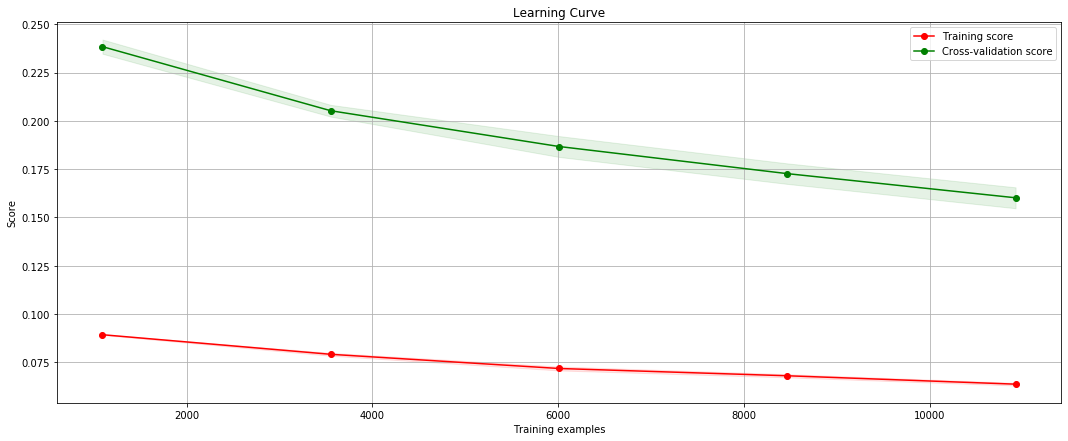

In [39]:
from scikitplot.estimators import plot_learning_curve
plot_learning_curve(model, X_train, y_train.values.ravel(), cv=5, figsize=(18,7), scoring=custom_rmsle)